# Fase di pulizia e analisi dataset

Eseguiamo nuove operazioni di pulizia del dataset, in particolare:
- rimozione di caratteri speciali
- rimozione di stopwords
- rimozione di numeri
- lemmatizzazione

Gli altri notebook partono dall'output di questo notebook.

## Pulizia 

### Parte da ESEGUIRE SEMPRE

Import e definizione delle funzioni

### Spacy

Lemmattizattore, rimozione stopwords, numeri e caratteri speciali, 

In [2]:
#spacy cleaner

#loading and cleaning dataset with spacy
import spacy
import pandas as pd
import regex as re

'''
load_stopwords_list(file_path: str) -> list
    Load stopwords from a file containing one stopword per line.
'''
def load_stopwords_list(file_path = "data/it_stopwords_kaggle.txt"):
    with open(file_path, 'r') as f:
        return f.read().splitlines()


def cleaner_spacy(s):
    #load stopwords and adding to the model
    italian_stopwords = load_stopwords_list()
    for stopword in italian_stopwords:
        lexeme = nlp.vocab[stopword]
        lexeme.is_stop = True

    
    #removing numbers and special caracters
    s = re.sub(r'[^a-z\s]', '', s).strip()

    #removing multiple spaces
    s = " ".join(s.split()).strip()

    #some manual corrections
    s = s.replace(' accino', ' vaccino')

    #removing stopwords
    s = remove_stopwords_spacy(s)

    #removing by minimun length
    s = remove_by_minimum_length_spacy(s, 2)

    #lemmatization with spacy
    doc = nlp(s)
    return " ".join([token.lemma_ for token in doc if not token.is_stop]).strip()

def remove_stopwords_spacy(s):
    doc = nlp(s)
    return " ".join([token.text for token in doc if not token.is_stop]).strip()

def remove_by_minimum_length_spacy(s,  min_length : int) -> str:
    doc = nlp(s)
    return " ".join([token.text for token in doc if len(token.text) > min_length]).strip()

nlp = spacy.load("it_core_news_md")

stopwords = load_stopwords_list()

#### Snowball

Stemming, stopwords, numeri e caratteri speciali

In [4]:
#snowball cleaner

#versione con snowball e nltk
#loading and cleaning dataset with spacy
import spacy
import pandas as pd
import regex as re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
it_stopwords = stopwords.words('italian')

#the stemmer requires a language parameter
snow_stemmer = SnowballStemmer(language='italian')

def cleaner_snowball(s):
    #removing numbers and special caracters
    s = re.sub(r'[^a-z\s]', '', s).strip()
    #remving multiple spaces
    s = " ".join(s.split()).strip()
    #removing apostrophe and splititng words
    s = s.replace("'", " ")
    #some manual corrections
    #s = s.replace(' accino', ' vaccino')
    #removing stopwords with nltk
    s = stop_word_remover_snowball(s)
    #stemming with nltk
    s = stemmer_snowball(s)

    return s


def stop_word_remover_snowball(text):
    word_tokens = word_tokenize(text)
    word_list = [word for word in word_tokens if word.lower() not in it_stopwords]
    return " ".join(word_list)

def stemmer_snowball(text):
    words = word_tokenize(text)
    stem_words = [snow_stemmer.stem(word) for word in words]
    return " ".join(stem_words)
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lorenzo2004/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Caricamento dataset e pulizia avanzata

Spacy o snowball

In [3]:
#circa 7min di esecuzione con modello già caricato

#loading and cleaning dataset with spacy
import spacy
import pandas as pd
import regex as re


#load pandas dataframe
vax_df = pd.read_csv('data/posts_cleaned_it_only.csv')

#selezioniamo solo la colonna clean_text
vax_df = vax_df['clean_text']

#applichiamo la funzione di pulizia
vax_df_cleaned = vax_df.apply(cleaner_spacy)

#esportiamo il dataset pulito in formato csv 
vax_df_cleaned.to_csv('data/posts_ULTRAcleaned_it_only_spacy.csv', index=False)

### Versione con snowball e stemmer

In [6]:
#load pandas dataframe
vax_df = pd.read_csv('data/posts_cleaned_it_only.csv')
#selezioniamo solo la colonna clean_text
vax_df = vax_df['clean_text']

#applichiamo la funzione di pulizia
vax_df_cleaned = vax_df.apply(cleaner_snowball)

#esportiamo il dataset pulito in formato csv 
vax_df_cleaned.to_csv('data/posts_ULTRAcleaned_it_snowball.csv', index=False)

vax_df_cleaned

0                  pront affront settiman quirinal booster
1        pass sanit guarigion val booster pezz dos migl...
2        vaccin bambin ricev almen dos ital booster ove...
3        forz po seren sbrocc period perc certezz cur p...
4        vaccin tredos inter famigl posit covid influen...
                               ...                        
19099    mett tg trov videogioc war games spost rai new...
19100    ucrain nelleffig bracc donn raffigur stepan ba...
19101    chiam carmen ragazz anni viv bologn v orre rac...
19102    riconosc pi corp prim mai dat alcun problem co...
19103    bombard pur covid adess assembr sicur picc con...
Name: clean_text, Length: 19104, dtype: object

## Analisi del dataset  

Eseguire sempre prima la cella con import!

In [30]:
#import analisi del dataset (ESEGUIRE SEMPRE)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

Parole più frequenti nel dataset:


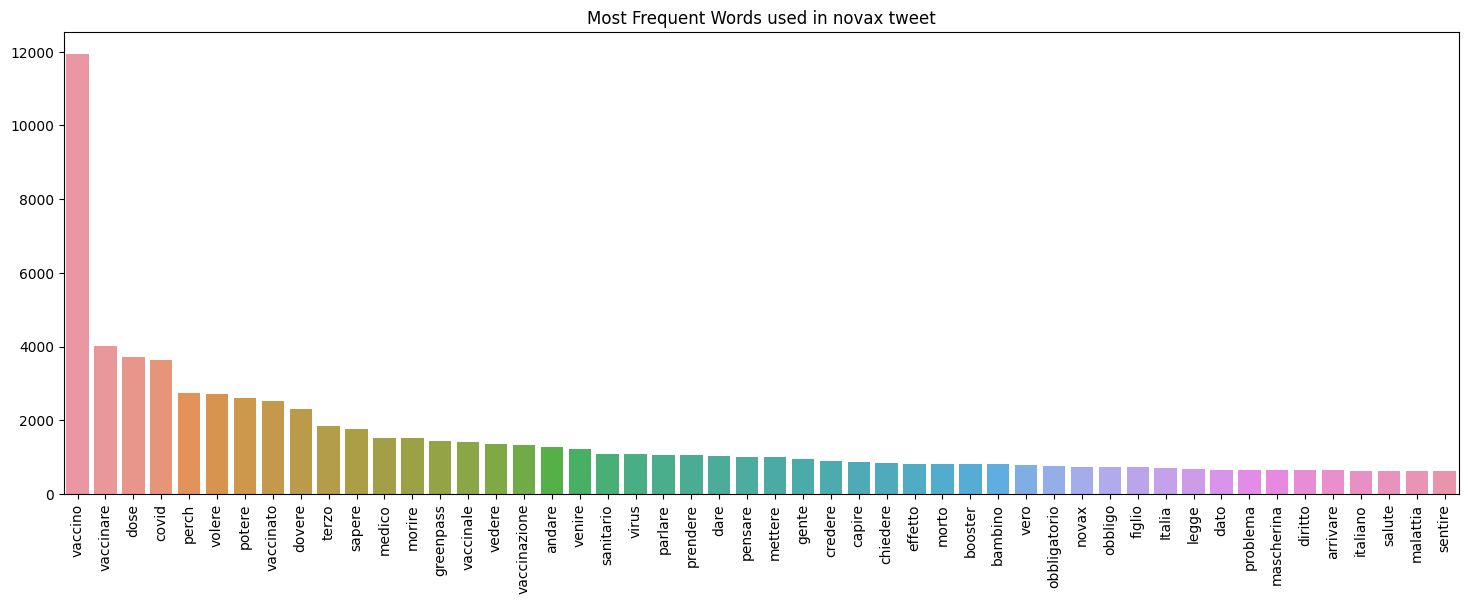

In [31]:
# PAROLE PIÙ FREQUENTI



#load pandas dataframe (rimuovo le righe vuote che putroppo sono presenti)
vax_series = pd.read_csv('data/posts_ULTRAcleaned_it_only_spacy.csv')
vax_series.dropna(inplace=True)

#contiamo le parole
aggregate_counter = Counter()
for row in vax_series["clean_text"]:
    c = Counter(row.split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]

#disegnamo i grafici
def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

print("Parole più frequenti nel dataset:")
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Words used in novax tweet')




Numero di caratteri:
count    19096.000000
mean       174.190930
std        295.915947
min          4.000000
25%         52.000000
50%         97.000000
75%        168.000000
90%        319.000000
95%        561.000000
99%       1897.100000
max       2798.000000
Name: char_count, dtype: float64


<AxesSubplot: title={'center': 'Number of characters in tweets'}, ylabel='Frequency'>

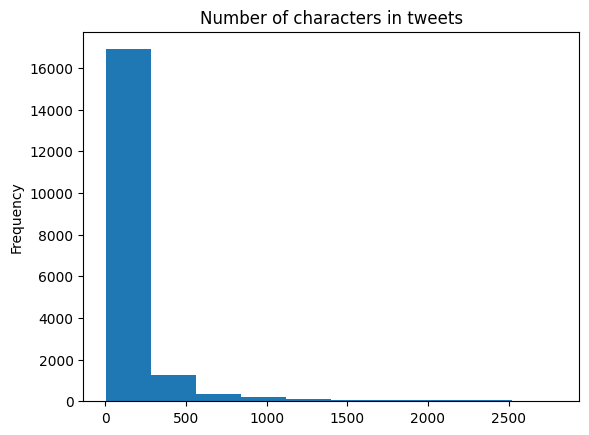

In [32]:
# NUMERO DI CARATTERI

print("Numero di caratteri:")
vax_series['char_count'] = vax_series['clean_text'].apply(len)
print(vax_series['char_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

#disegnamo il grafico
vax_series['char_count'].plot.hist(bins=10, title='Number of characters in tweets')

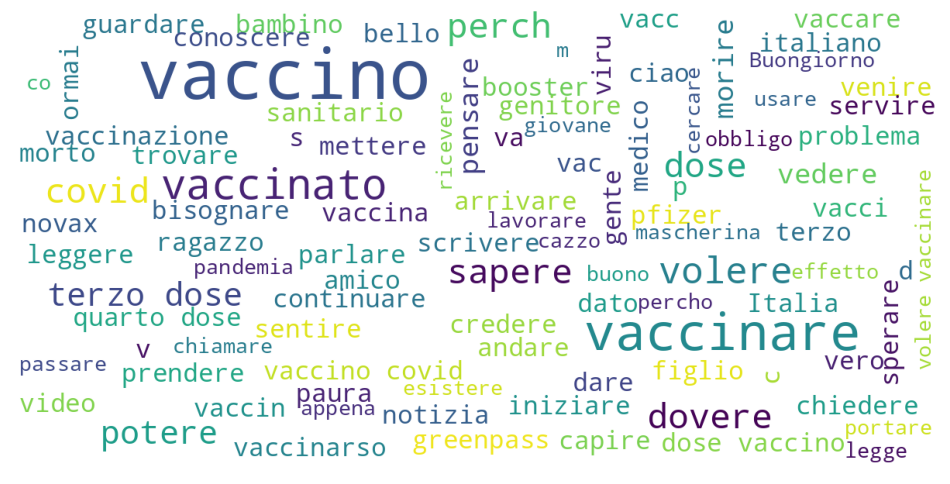

In [33]:
# WORDCLOUD

from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data) )

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(vax_series['clean_text'].to_string())